In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod


class BodePlotter(ABC):
    @abstractmethod
    def get_G_j_w(self, w):
        """
        Calculate forward loop gain given w
        """
        pass

    def get_M(self, w, h=1):
        G_j_w = self.get_G_j_w(w)
        return 20 * math.log10((abs(G_j_w) * abs(h)))

    def get_phi(self, w):
        G_j_w = self.get_G_j_w(w)
        return np.arctan2(np.real(G_j_w), np.imag(G_j_w))

    def get_bode_plot(self):
        x = [0.1, 1, 10, 100]
        m = [self.get_M(i) for i in x]
        phi = [self.get_phi(i) for i in x]
        ax1, ax2 = self.configure_axis()
        ax1.plot(x, m)
        ax2.plot(x, phi)
        plt.show()


    @staticmethod
    def configure_axis():
        fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        ax2.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        fig.suptitle('Bode Plot')
        plt.xlabel(r'$\omega$')
        ax1.set_ylabel(r'$M(db)$')
        ax2.set_ylabel(r'$\phi$')
        ax1.grid()
        ax2.grid()
        return ax1, ax2



#Usage

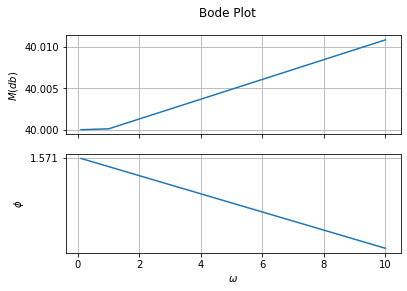

In [41]:
class MyBodePlotter(BodePlotter):
    def get_G_j_w(self, w):
        """G(s) = K/2s+100"""
        k = 1
        s = complex(0, w)
        g = k / 2 * s + 100
        return g


plotter = MyBodePlotter()
plotter.get_bode_plot()